# Task 1 - Visualize Multilingual Dataset

- *Load the Multilingual Dataset*
- *Display basic info of the dataset*
- *Visualize the Distribution of Languages in the Dataset*
- *Visualize the Distribution of Categories by Language* 
- *Visualize the Intent Counts by Category and Language*
- *Visualize the Length of Instructions per Language*
- *Visualize the Length of Responses per Language*
- *Visualize Frequent Words in Instructions and Responses of all Languages*

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [2]:
# Load the newly created multilingual dataset
multilingual_df = pd.read_csv('data/Multilingual_Customer_Support_Training_Dataset.csv')

In [3]:
# Display basic information about the dataset
print(multilingual_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80616 entries, 0 to 80615
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flags        80616 non-null  object
 1   category     80616 non-null  object
 2   intent       80616 non-null  object
 3   instruction  80616 non-null  object
 4   response     80616 non-null  object
 5   language     80616 non-null  object
dtypes: object(6)
memory usage: 3.7+ MB
None


In [4]:
# Display the first few rows of the dataset to check the structure
print(multilingual_df.head())

   flags category        intent  \
0      B    ORDER  cancel_order   
1    BQZ    ORDER  cancel_order   
2   BLQZ    ORDER  cancel_order   
3     BL    ORDER  cancel_order   
4  BCELN    ORDER  cancel_order   

                                         instruction  \
0  en_XX question about cancelling order ORD12345...   
1  en_XX i have a question about cancelling oorde...   
2  en_XX i need help cancelling puchase ORD12345 ...   
3      en_XX I need to cancel purchase ORD12345 </s>   
4  en_XX I cannot afford this order, cancel purch...   

                                            response language  
0  en_XX I've understood you have a question rega...       en  
1  en_XX I've been informed that you have a quest...       en  
2  en_XX I can sense that you're seeking assistan...       en  
3  en_XX I understood that you need assistance wi...       en  
4  en_XX I'm sensitive to the fact that you're fa...       en  


/tmp/ipykernel_53980/3530174944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=multilingual_df, x='language', palette='Set2')


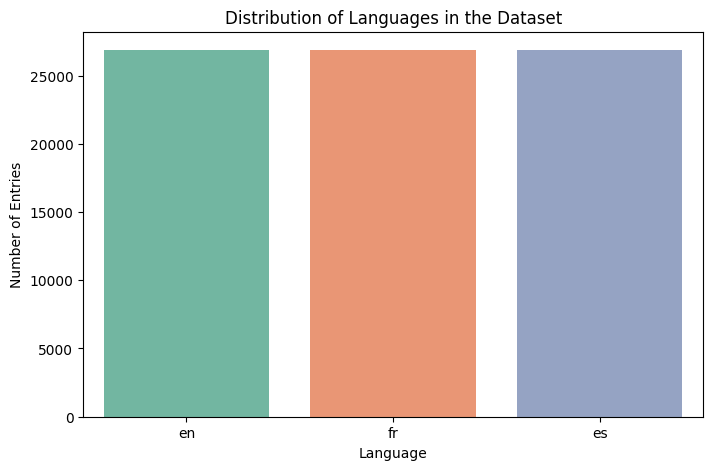

In [5]:
# Visualization 1: Distribution of Languages in the Dataset
plt.figure(figsize=(8, 5))
sns.countplot(data=multilingual_df, x='language', palette='Set2')
plt.title('Distribution of Languages in the Dataset')
plt.xlabel('Language')
plt.ylabel('Number of Entries')
plt.show()

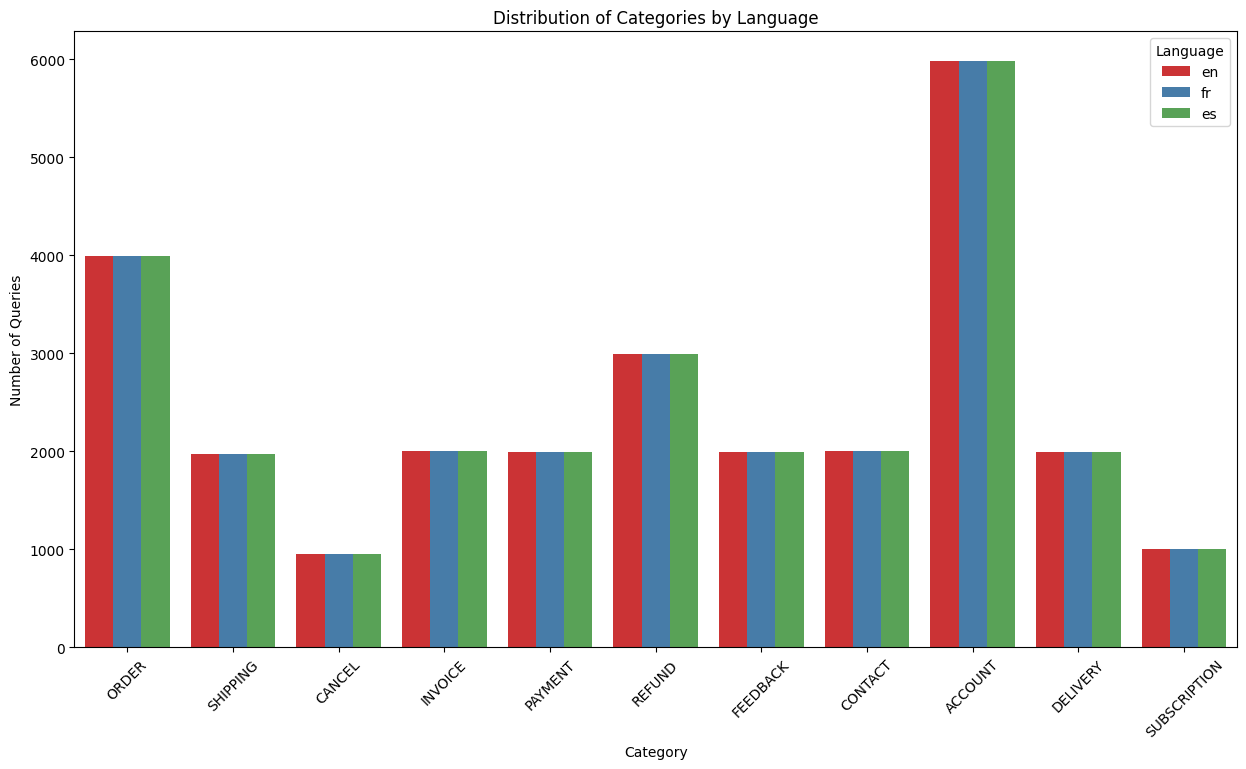

In [6]:
# Visualization 2: Distribution of Categories by Language
plt.figure(figsize=(15, 8))
sns.countplot(data=multilingual_df, x='category', hue='language', palette='Set1')
plt.title('Distribution of Categories by Language')
plt.xlabel('Category')
plt.ylabel('Number of Queries')
plt.xticks(rotation=45)
plt.legend(title='Language')
plt.show()

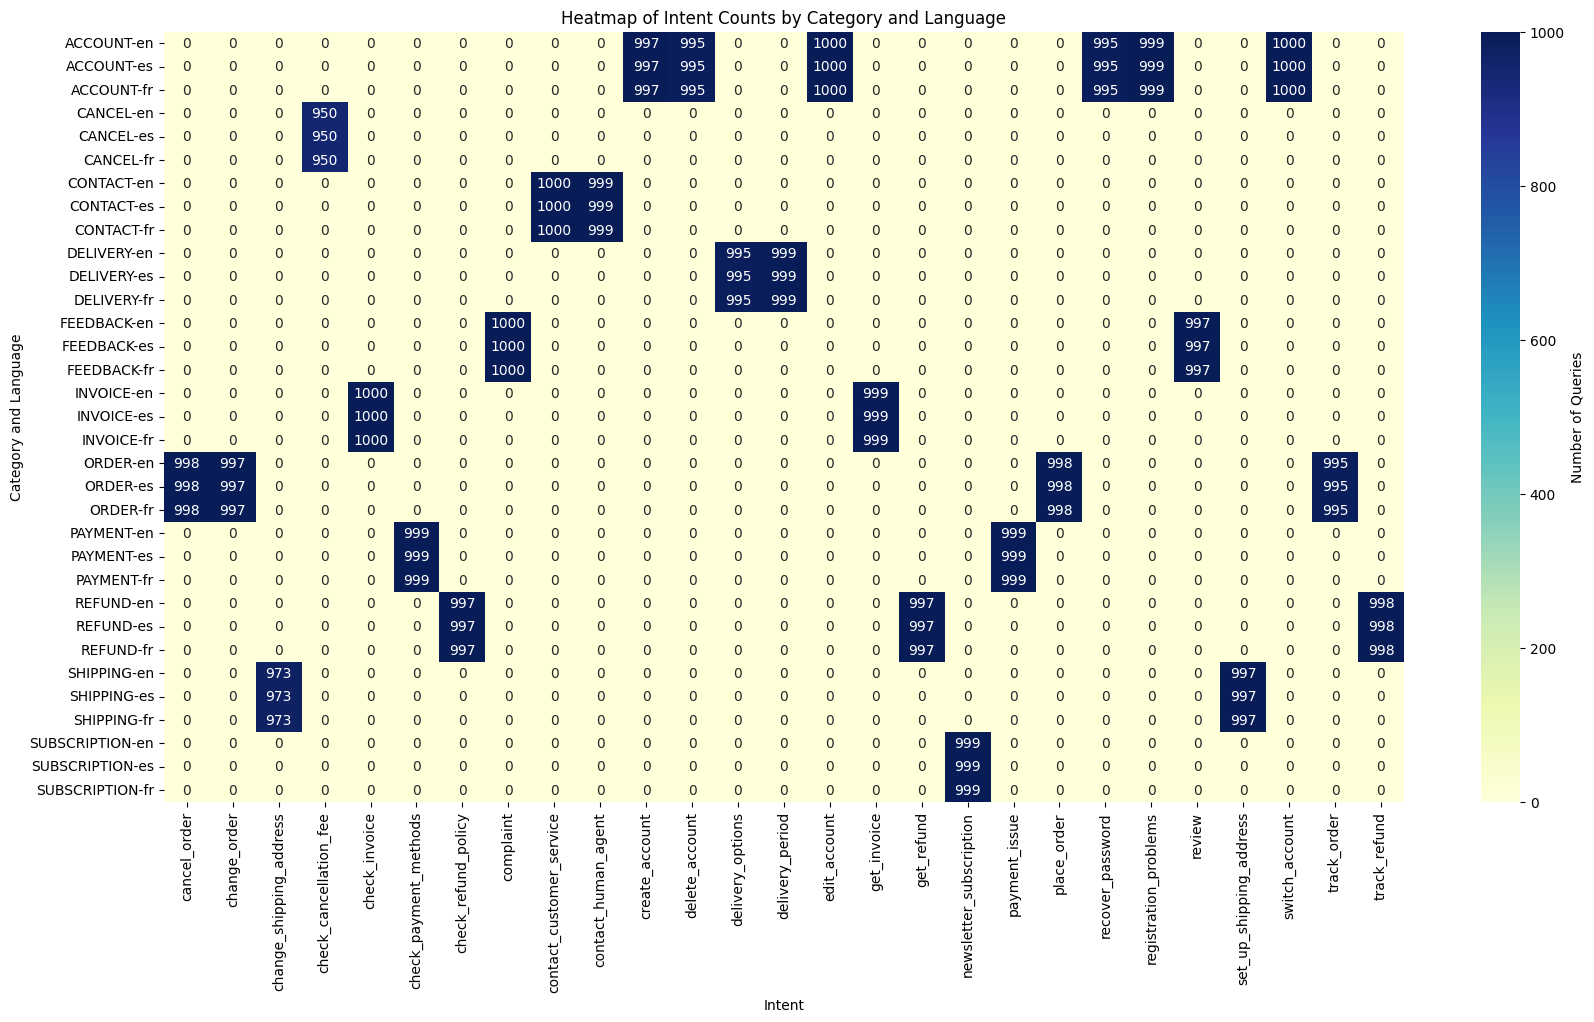

In [7]:
# Visualization 3: Heatmap of Intent Counts by Category and Language
intent_counts = multilingual_df.groupby(['category', 'language'])['intent'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(20, 10))
sns.heatmap(intent_counts, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Queries'})
plt.title('Heatmap of Intent Counts by Category and Language')
plt.xlabel('Intent')
plt.ylabel('Category and Language')
plt.show()

/tmp/ipykernel_53980/4220363488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=multilingual_df, x='language', y='instruction_length', palette='coolwarm')


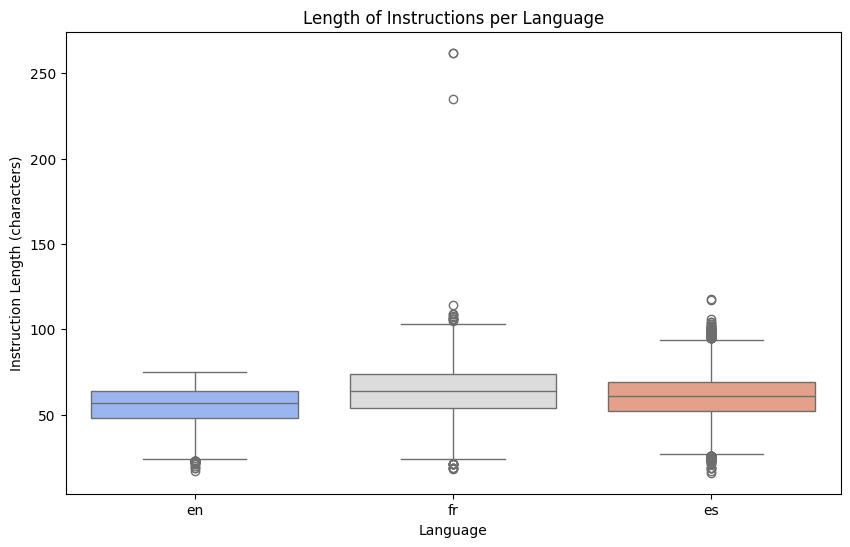

In [8]:
# Visualization 4: Length of Instructions per Language
multilingual_df['instruction_length'] = multilingual_df['instruction'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(data=multilingual_df, x='language', y='instruction_length', palette='coolwarm')
plt.title('Length of Instructions per Language')
plt.xlabel('Language')
plt.ylabel('Instruction Length (characters)')
plt.show()

/tmp/ipykernel_53980/3027821704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=multilingual_df, x='language', y='response_length', palette='coolwarm')


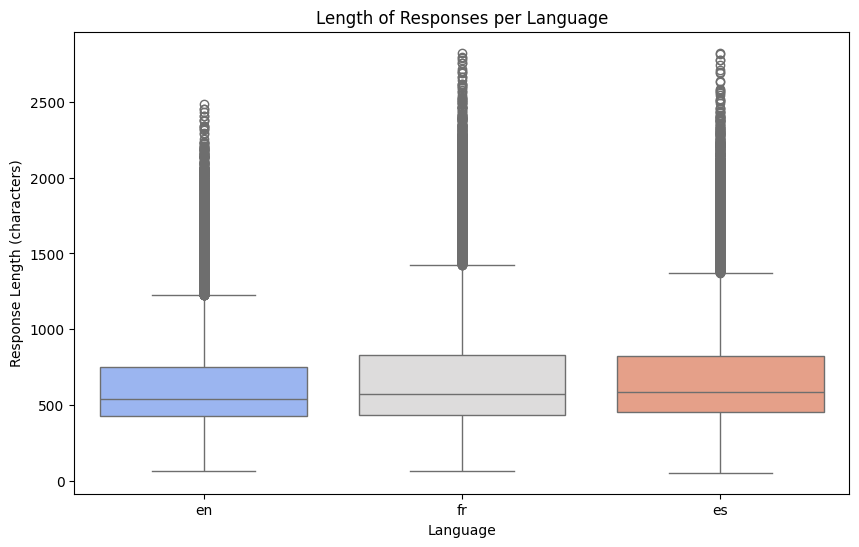

In [9]:
# Visualization 5: Length of Responses per Language
multilingual_df['response_length'] = multilingual_df['response'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(data=multilingual_df, x='language', y='response_length', palette='coolwarm')
plt.title('Length of Responses per Language')
plt.xlabel('Language')
plt.ylabel('Response Length (characters)')
plt.show()

[nltk_data] Downloading package stopwords to /home/surya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


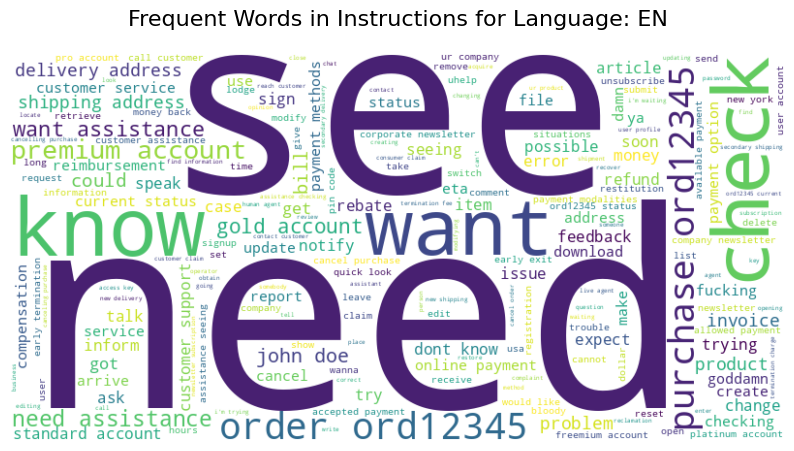

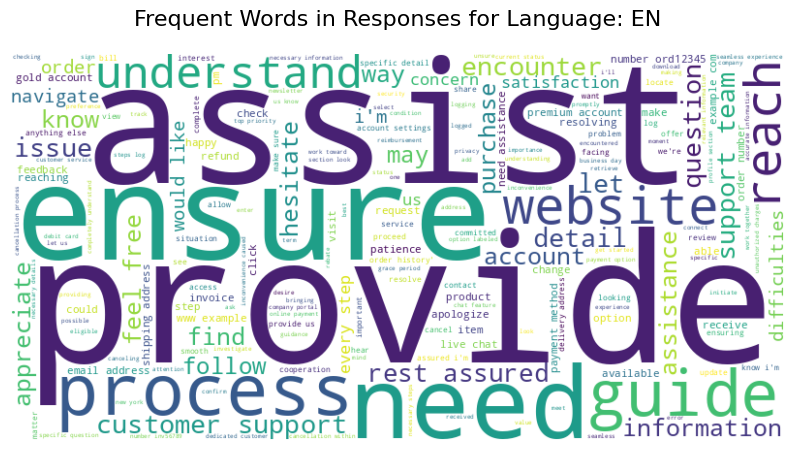

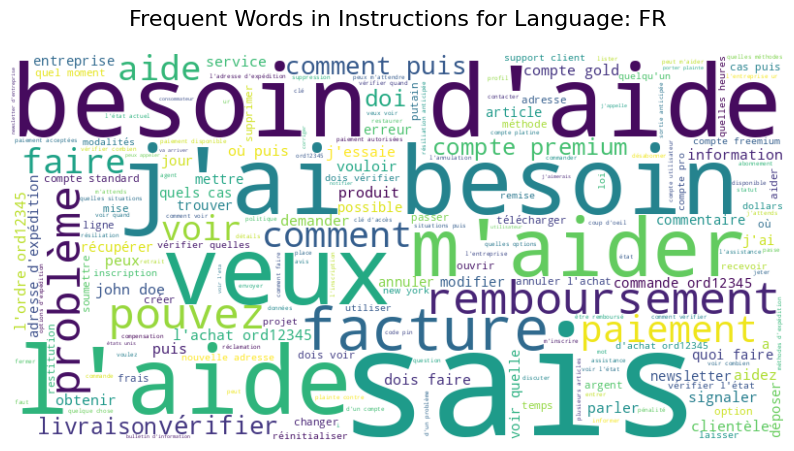

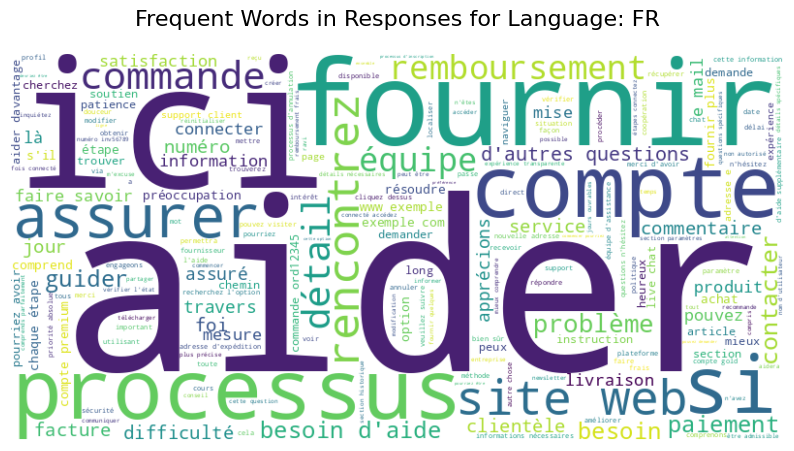

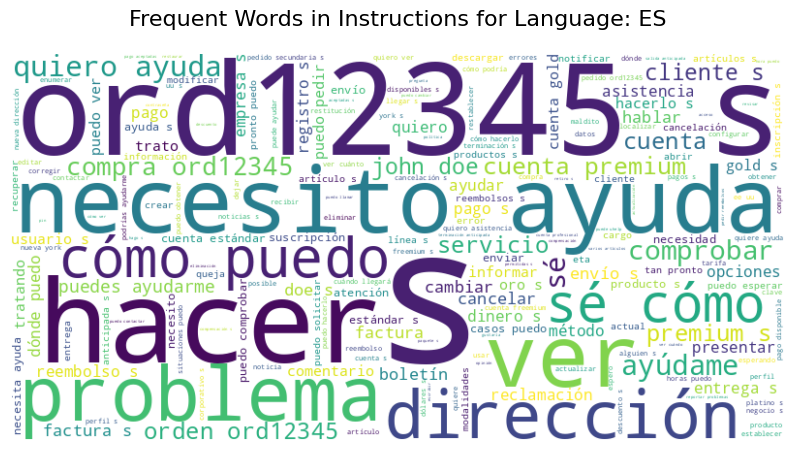

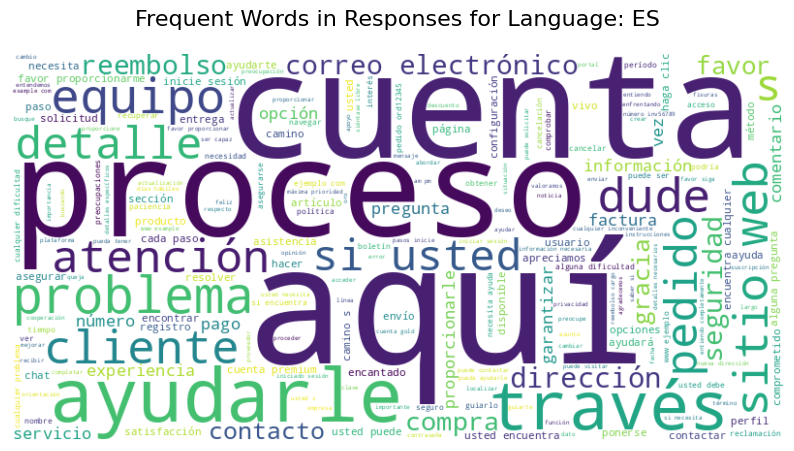

In [10]:
# Download stopwords from NLTK if not already downloaded
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define languages for analysis
languages = ['en', 'fr', 'es']

# Define stop words for each language using NLTK
stopwords_dict = {
    'en': set(stopwords.words('english')),
    'fr': set(stopwords.words('french')),
    'es': set(stopwords.words('spanish'))
}

# Add custom stopwords
custom_stopwords = set(['please', 'help', 'thank', 'query', 'en_xx', 'fr_xx', 'es_xx'])
for lang in stopwords_dict:
    stopwords_dict[lang].update(custom_stopwords)

# Function to generate a word cloud for a given text
def generate_word_cloud(text, stopwords, title):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=stopwords,
                          colormap='viridis',
                          max_words=200,
                          random_state=42).generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, pad=20)
    plt.show()
    print("\n")

# Generate word clouds for "instruction" and "response" columns for each language
for lang in languages:
    # Filter dataset for the specific language
    df_lang = multilingual_df[multilingual_df['language'] == lang]

    # Combine all instructions and responses into single texts
    instructions_text = ' '.join(df_lang['instruction'].astype(str).tolist()).lower()
    responses_text = ' '.join(df_lang['response'].astype(str).tolist()).lower()

    # Generate word cloud for instructions
    generate_word_cloud(instructions_text, stopwords_dict[lang], f'Frequent Words in Instructions for Language: {lang.upper()}')

    # Generate word cloud for responses
    generate_word_cloud(responses_text, stopwords_dict[lang], f'Frequent Words in Responses for Language: {lang.upper()}')


# Task 2 - Analyze Dataset with MBart

- *Load MBart model and tokenizer*
- *Tokenize the Instructions and Responses from the Multilingual Dataset*
- *Create Dataframes with Length values of the Tokenized Instructions and Responses*
- *Calculate 95-100th Length Percentiles for the Tokenized Instructions and Responses using the Dataframes*

In [11]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

# Load the tokenizer and model
model_path = "models/mbart-large-50"
tokenizer = MBart50TokenizerFast.from_pretrained(model_path, local_files_only=True, padding_side='right')
model = MBartForConditionalGeneration.from_pretrained(model_path)

# Apply the tokenizer to calculate the token lengths for instructions and responses
multilingual_df['instruction_length'] = multilingual_df['instruction'].apply(lambda x: len(tokenizer.tokenize(x)))
multilingual_df['response_length'] = multilingual_df['response'].apply(lambda x: len(tokenizer.tokenize(x)))

/home/surya/anaconda3/envs/chatbot-env/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
# Calculate and print percentiles from 95% to 100% for instruction and response lengths
percentiles = [95, 96, 97, 98, 99, 100]
response_percentile_values = multilingual_df['response_length'].quantile([p/100 for p in percentiles])
instruction_percentile_values = multilingual_df['instruction_length'].quantile([p/100 for p in percentiles])

print("Response Length Percentiles:")
print(response_percentile_values)

print("\nInstruction Length Percentiles:")
print(instruction_percentile_values)

Response Length Percentiles:
0.95    303.0
0.96    327.4
0.97    372.0
0.98    405.0
0.99    441.0
1.00    627.0
Name: response_length, dtype: float64

Instruction Length Percentiles:
0.95     19.0
0.96     20.0
0.97     20.0
0.98     21.0
0.99     22.0
1.00    114.0
Name: instruction_length, dtype: float64
